In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 2.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install yfinance --quiet 

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [6]:
# Download 5 years of Google (GOOGL) stock data
data = yf.download('GOOGL', start='2018-01-01', end='2023-12-31')
data = data[['Close']]  # We'll use only the 'Close' price
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,GOOGL
Date,
2018-01-02,53.405174
2018-01-03,54.316315
2018-01-04,54.527306
2018-01-05,55.250347
2018-01-08,55.445415


In [7]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [8]:
# Create sequences
X = []
y = []
seq_len = 60

for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i - seq_len:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

In [9]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [11]:
model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0390 - val_loss: 0.0015
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.9773e-04 - val_loss: 0.0012
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3203e-04 - val_loss: 0.0011
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3781e-04 - val_loss: 0.0011
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5741e-04 - val_loss: 0.0016
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8855e-04 - val_loss: 9.8193e-04
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5590e-04 - val_loss: 9.7749e-04
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0012e-04 - val_loss: 0.0037
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 0.0017


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


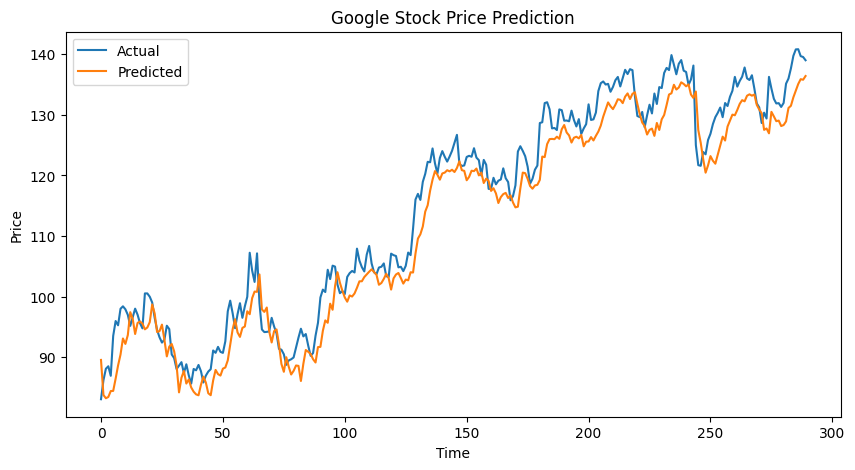

In [14]:
# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()